In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv("/content/Iris.csv")

In [5]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Species_encoded"] = le.fit_transform(df["Species"])


In [9]:
df.head(150)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Species_encoded
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [10]:
X=df.iloc[:,:-2]

In [11]:
Y=df.iloc[:,-1]

In [12]:
print(X)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0      1            5.1           3.5            1.4           0.2
1      2            4.9           3.0            1.4           0.2
2      3            4.7           3.2            1.3           0.2
3      4            4.6           3.1            1.5           0.2
4      5            5.0           3.6            1.4           0.2
..   ...            ...           ...            ...           ...
145  146            6.7           3.0            5.2           2.3
146  147            6.3           2.5            5.0           1.9
147  148            6.5           3.0            5.2           2.0
148  149            6.2           3.4            5.4           2.3
149  150            5.9           3.0            5.1           1.8

[150 rows x 5 columns]


In [13]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species_encoded, Length: 150, dtype: int64


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
model=DecisionTreeClassifier()

In [34]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [35]:
from sklearn import tree

[Text(0.4, 0.8333333333333334, 'x[0] <= 50.5\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 100.5\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 41\nvalue = [0, 41, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]')]

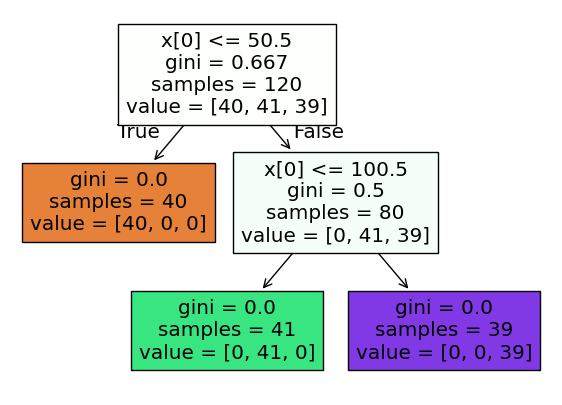

In [38]:
plt.figure(figsize=(7,5))
tree.plot_tree(model,filled=True)

In [39]:
y_pred=model.predict(X_test)

In [40]:
print(y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [41]:
from sklearn.metrics import classification_report,accuracy_score



In [43]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [44]:
#prepruning and postpruning avoids overfitting in decision tree


In [45]:
#prepruning
parameters={
    'max_depth':[1,2,3,4,5],
    'max_features':[1,2,3,4,5],
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random']
}

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
model=DecisionTreeClassifier()
cv=GridSearchCV(model,param_grid=parameters,cv=5,scoring='accuracy')

In [49]:
cv.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [50]:
cv.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 4,
 'splitter': 'random'}

In [51]:
y_pred=cv.predict(X_test)

In [53]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

